# Building the model (K-means)

## Libraries

In [2]:
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

from sklearn.cluster import KMeans
from sklearn.metrics import classification_report
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

## Importing the data

In [3]:
df = pd.read_csv('final_df.csv')

In [4]:
df.shape

(1232, 16)

In [5]:
df.head()

,Unnamed: 0,product,brand,price,weight,kj,kcal,fat,sat_fat,carbs,sugar,fibre,protein,salt,product_link,photo_link
0,0,Soja Protein Crispies 58 % mit Kakao,Koro,14.0,1.0,1535.0,362.0,19.0,4.0,282.0,91.0,18.0,58.0,27.0,https://www.korodrogerie.de/soja-protein-crisp...,https://koro2.imgix.net/media/image/f1/50/81/C...
1,1,Schokodrops mit Xylit,Koro,21.0,1.0,2290.0,555.0,46.0,28.0,31.0,10.0,10.0,92.0,7.0,https://www.korodrogerie.de/schokodrops-mit-xy...,https://koro2.imgix.net/media/image/2c/01/f8/S...
2,2,Schoko Protein Crunchies ohne Zuckerzusatz,Koro,20.0,1.0,1875.0,448.0,28.0,12.0,37.0,14.0,83.0,21.0,36.0,https://www.korodrogerie.de/schoko-protein-cru...,https://koro2.imgix.net/media/image/30/78/62/P...
3,3,Soja Protein Crispies 60 %,Koro,13.0,1.0,1541.0,363.0,18.0,2.0,26.0,8.0,8.0,60.0,32.0,https://www.korodrogerie.de/soja-protein-crisp...,https://koro2.imgix.net/media/image/84/55/ca/C...
4,4,Bohnen-Erbsen-Mix geröstet & gesalzen,Koro,11.5,1.0,1766.0,421.0,14.0,23.0,35.0,67.0,10.0,33.0,10.0,https://www.korodrogerie.de/bohnen-erbsen-mix-...,https://koro2.imgix.net/media/image/a9/37/79/B...


## Preprocessing the data

#### Dropping duplicate index column

In [8]:
df = df.drop('Unnamed: 0', axis=1)

#### Reducing number of items in brand column

In [43]:
pd.set_option('display.min_rows', 40)
pd.set_option('display.max_rows', 40)

In [44]:
df['brand'].value_counts()

Koro                   221
Foodist                 96
mind sweets             40
Plamil                  30
Heimatgut               29
Lovechock               28
Lini's Bites            27
Vivani                  27
Moo Free                26
Rapunzel                20
Lubs                    20
Birkengold              19
Not Guilty              18
MYLKCHOCY               18
Taste of Nature         18
Zebra                   18
Green & More            18
ÖKOVITAL                16
Zotter                  16
Naturata                16
                      ... 
RUF                      3
Kuhbonbon                3
Clarana                  3
Wheaty                   3
Le Moulin du Pivert      2
BauckHof                 2
3 Pauly                  2
frusano                  2
Gross                    2
Biovegan                 2
Rettergut                2
Fine Gusto               2
Lord of Tofu             1
Liebhart's               1
Raab                     1
Céliane                  1
v

In [42]:
def clean_brand(col, lst_brands=[]):
    
    brand_new = []
    
    for p in col:
        if p not in lst_brands:
            brand_new.append('Other')
        else:
            brand_new.append(p)
    
    return brand_new

In [ ]:
keep_brands = []

df['brand_new'] = clean_brand(df['brand'], lst_brands=keep_brands)
df['brand_new'].value_counts()

#### Get dummies for brand column

#### New dataframe (numerical columns only)

In [9]:
df_num = df.select_dtypes(np.number)

In [10]:
df_num.head()

,price,weight,kj,kcal,fat,sat_fat,carbs,sugar,fibre,protein,salt
0,14.0,1.0,1535.0,362.0,19.0,4.0,282.0,91.0,18.0,58.0,27.0
1,21.0,1.0,2290.0,555.0,46.0,28.0,31.0,10.0,10.0,92.0,7.0
2,20.0,1.0,1875.0,448.0,28.0,12.0,37.0,14.0,83.0,21.0,36.0
3,13.0,1.0,1541.0,363.0,18.0,2.0,26.0,8.0,8.0,60.0,32.0
4,11.5,1.0,1766.0,421.0,14.0,23.0,35.0,67.0,10.0,33.0,10.0


#### Null values

#### Scaling the data

## Model building

### First run

In [22]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(df)

KMeans(n_clusters=3, random_state=42)

In [23]:
# Predicting / assigning the clusters:
clusters = kmeans.predict(new_df_transformed)
clusters

array([2, 0, 1, 2, 0, 0, 1, 0, 2, 0, 1, 2, 0, 0, 2, 2, 2, 0, 2, 1, 2, 2,
       0, 2, 2, 0, 2, 2, 1, 2, 1, 2, 2, 0, 0, 1, 2, 0, 2, 0, 1, 1, 1, 0,
       1, 2, 1, 2, 2, 2, 1, 1, 0, 0, 1, 2, 2, 0, 0, 0, 2, 1, 2, 2, 2, 0,
       2, 0, 0, 2, 2, 1, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 2,
       2, 2, 0, 1, 2, 1, 0, 2, 2, 0, 1, 0, 1, 1, 1, 2, 0, 1, 1, 1, 0, 1,
       1, 0, 2, 2, 1, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 2,
       2, 2, 0, 2, 1, 0, 1])

In [24]:
# Check the size of the clusters
pd.Series(clusters).value_counts().sort_index()

0    53
1    35
2    51
dtype: int64

In [25]:
# Explore the cluster assignment in the original dataset
new_df['cluster'] = clusters
new_df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,cluster
0,0.507,0.207,0,-10.215,1,0.0998,0.9310,0.000000,0.2290,0.774,68.600,2.645333,4,2
1,0.725,0.571,1,-6.007,1,0.1020,0.0183,0.000000,0.0519,0.610,146.035,3.348000,4,0
2,0.339,0.214,4,-11.714,1,0.0375,0.9080,0.000007,0.3410,0.363,94.775,3.444000,3,1
3,0.657,0.560,6,-9.049,0,0.0467,0.4980,0.000000,0.0794,0.854,161.993,3.049117,4,2
4,0.336,0.627,7,-7.463,1,0.0384,0.1640,0.000000,0.0708,0.350,150.273,4.018450,4,0


In [26]:
# "performance metric"
kmeans.inertia_

1356.6906162267012

### Chosing the best k

In [27]:
kmeans = KMeans(n_clusters=3, random_state=1234, verbose=1, n_init=1)
kmeans.fit(new_df_transformed)
kmeans.inertia_

Initialization complete
Iteration 0, inertia 1930.148882598581
Iteration 1, inertia 1499.2981564551437
Iteration 2, inertia 1438.2199316423985
Iteration 3, inertia 1419.616148272653
Iteration 4, inertia 1403.5629147032973
Iteration 5, inertia 1394.9059131815436
Iteration 6, inertia 1391.793470050307
Iteration 7, inertia 1390.948712073468
Iteration 8, inertia 1390.4481269664373
Iteration 9, inertia 1389.3879743590335
Iteration 10, inertia 1388.9592090116848
Iteration 11, inertia 1388.623399785878
Iteration 12, inertia 1387.8434025894146
Iteration 13, inertia 1384.539532527336
Iteration 14, inertia 1383.5242112334465
Converged at iteration 14: strict convergence.


1383.5242112334465

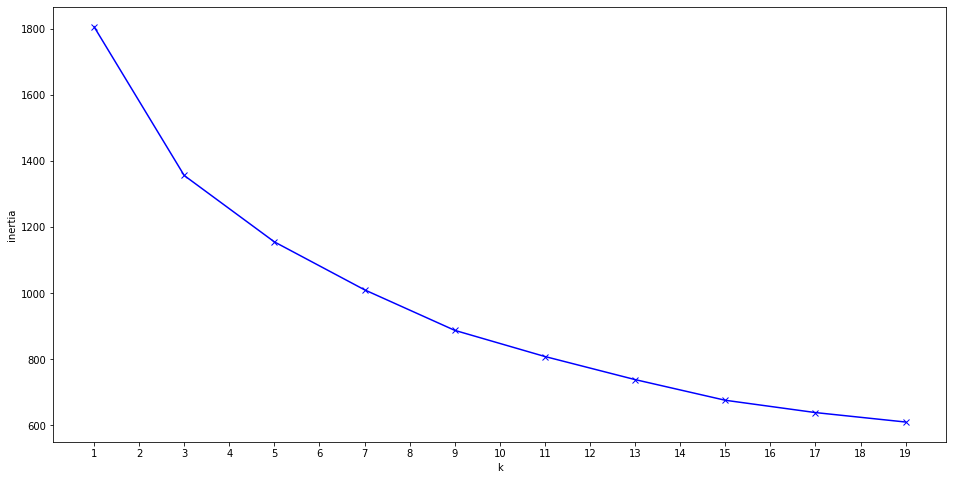

In [32]:
K = range(1, 20,2)

inertia = []

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=1234)
    kmeans.fit(new_df_transformed)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.show()

### Silhouette score

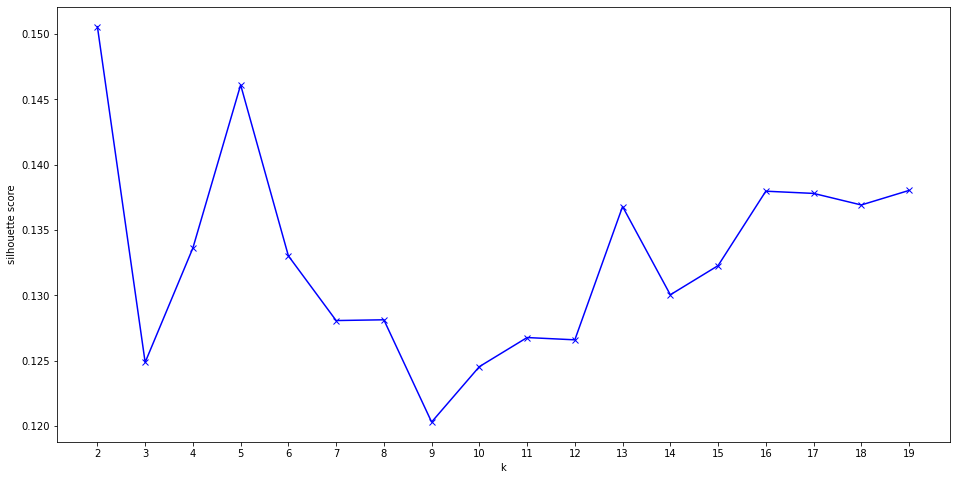

In [30]:
K = range(2, 20)

silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(new_df_transformed)
    silhouette.append(silhouette_score(new_df_transformed, kmeans.predict(new_df_transformed)))


plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.show()

In [31]:
print(classification_report(y, new_df['cluster']))

NameError: name 'y' is not defined